#Setting Up the Environment

In [1]:
pip install tensorflow keras matplotlib numpy pandas scikit-learn kaggle


# Download and Load the Dataset

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = 'sankardev'
os.environ['KAGGLE_KEY'] = '479508fd3b2d829c2eaff2c54a4c87ed'

In [4]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition
!unzip fruit-and-vegetable-image-recognition.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:52<00:00, 43.4MB/s]
100% 1.98G/1.98G [00:52<00:00, 40.6MB/s]
Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: dataset/test/apple/Image_1.jpg  
  inflating: dataset/test/apple/Image_10.jpg  
  inflating: dataset/test/apple/Image_2.jpg  
  inflating: dataset/test/apple/Image_3.jpg  
  inflating: dataset/test/apple/Image_4.jpg  
  inflating: dataset/test/apple/Image_5.jpg  
  inflating: dataset/test/apple/Image_6.JPG  
  inflating: dataset/test/apple/Image_7.jpg  
  inflating: dataset/test/apple/Image_8.jpg  
  inflating: dataset/test/apple/Image_9.jpg  
  inflating: dataset/test/banana/Image_1.jpg  
  inflating: dataset/test/banana/Image_10.jpg  
  inflating: dataset/test/banana/Image_2.jpg  
  inflating: dataset/test/banana/Image_3.jpg  
  inflating: dataset/test/banana/Image_4.jpg  
  inflating: dataset/test/banana/Image_5.jpg  
  inflat

#Preprocessing the Data

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths

In [6]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Data augmentation

In [7]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [8]:
# Load datasets
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_data = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2510 images belonging to 36 classes.
Found 605 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


#Build and Train the Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 423s 5s/step - accuracy: 0.0269 - loss: -153333024.0000 - val_accuracy: 0.0248 - val_loss: -8033364480.0000
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 406s 5s/step - accuracy: 0.0288 - loss: -61500309504.0000 - val_accuracy: 0.0248 - val_loss: -704292192256.0000
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 454s 6s/step - accuracy: 0.0283 - loss: -1739180474368.0000 - val_accuracy: 0.0248 - val_loss: -8716289048576.0000
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 413s 5s/step - accuracy: 0.0227 - loss: -14807679893504.0000 - val_accuracy: 0.0248 - val_loss: -48244084178944.0000
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 438s 5s/step - accuracy: 0.0235 - loss: -69649492344832.0000 - val_accuracy: 0.0248 - val_loss: -174926216560640.0000
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 416s 5s/step - accuracy: 0.0221 - loss: -230577953308672.0000 - val_accuracy: 0.0248 - val_loss: -480144225468416.0000
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 454s 6s/step - accuracy: 0.0210 - loss: -605357789413376

# Evaluate the Model

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
model.save('fruit_veg_classifier.h5')


12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.0228 - loss: -7268665212796928.0000


Test Accuracy: 0.03


#Visualize Results

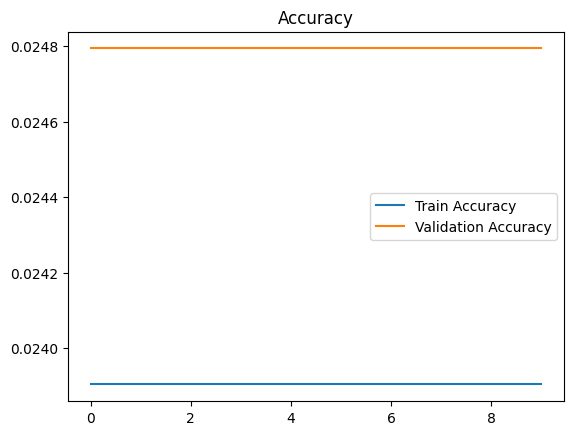

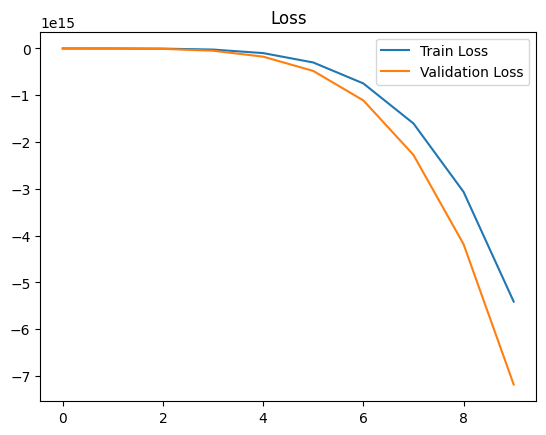

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()
